In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.collections import LineCollection

In [17]:
filename_dmin1 = './Price Data Round 2/prices_round_2_day_-1.csv'
filename_d0 = './Price Data Round 2/prices_round_2_day_0.csv'
filename_dplus1 = './Price Data Round 2/prices_round_2_day_1.csv'

# Load CSV with named columns
data_dmin1 = np.genfromtxt(filename_dmin1, delimiter=';', names=True, dtype=None, encoding='utf-8')
data_d0 = np.genfromtxt(filename_d0, delimiter=';', names=True, dtype=None, encoding='utf-8')
data_dplus1 = np.genfromtxt(filename_dplus1, delimiter=';', names=True, dtype=None, encoding='utf-8')

RAINFOREST_RESIN = "RAINFOREST_RESIN"
KELP = "KELP"
SQUID_INK = "SQUID_INK"
CROISSANTS= "CROISSANTS"
JAMS= "JAMS"
DJEMBES= "DJEMBES"
PICNIC_BASKET1= "PICNIC_BASKET1"
PICNIC_BASKET2= "PICNIC_BASKET2"

PRODUCTS = [
    RAINFOREST_RESIN,
    KELP,
    SQUID_INK,
    CROISSANTS,
    JAMS,
    DJEMBES,
    PICNIC_BASKET1,
    PICNIC_BASKET2
]

product_data_dmin1 = dict()
product_data_d0 = dict()
product_data_dplus1 = dict()

for product in PRODUCTS:
    product_data_dmin1[product] = data_dmin1[data_dmin1['product'] == product]
    product_data_d0[product] = data_d0[data_d0['product'] == product]
    product_data_dplus1[product] = data_dplus1[data_dplus1['product'] == product]

In [35]:
# Get data for Picnic Basket 1
pb1_dmin1 = product_data_dmin1[PICNIC_BASKET1]
pb1_d0 = product_data_d0[PICNIC_BASKET1]
pb1_dplus1 = product_data_dplus1[PICNIC_BASKET1]

pb2_dmin1 = product_data_dmin1[PICNIC_BASKET2]
pb2_d0 = product_data_d0[PICNIC_BASKET2]
pb2_dplus1 = product_data_dplus1[PICNIC_BASKET2]

cr_dmin1 = product_data_dmin1[CROISSANTS]
cr_d0 = product_data_d0[CROISSANTS]
cr_dplus1 = product_data_dplus1[CROISSANTS]

jams_dmin1 = product_data_dmin1[JAMS]
jams_d0 = product_data_d0[JAMS]
jams_dplus1 = product_data_dplus1[JAMS]

dje_dmin1 = product_data_dmin1[DJEMBES]
dje_d0 = product_data_d0[DJEMBES]
dje_dplus1 = product_data_dplus1[DJEMBES]

# Offset timestamps to make days continuous
# Let's assume the max timestamp in a single day is < 100_000
offset_d0 = 1_000_000
offset_dplus1 = 2_000_000

pb1_d0_ts = pb1_d0['timestamp'] + offset_d0
pb1_dplus1_ts = pb1_dplus1['timestamp'] + offset_dplus1

pb1_d0_ts = pb2_d0['timestamp'] + offset_d0
pb1_dplus1_ts = pb2_dplus1['timestamp'] + offset_dplus1

cr_d0_ts = pb1_d0['timestamp'] + offset_d0
cr_dplus1_ts = pb1_dplus1['timestamp'] + offset_dplus1

jams_d0_ts = pb1_d0['timestamp'] + offset_d0
jams_dplus1_ts = pb1_dplus1['timestamp'] + offset_dplus1

dje_d0_ts = pb1_d0['timestamp'] + offset_d0
dje_dplus1_ts = pb1_dplus1['timestamp'] + offset_dplus1

# Concatenate timestamps and mid_prices
timestamps = np.concatenate([pb1_dmin1['timestamp'], pb1_d0_ts, pb1_dplus1_ts])
mid_prices_pb1 = np.concatenate([pb1_dmin1['mid_price'], pb1_d0['mid_price'], pb1_dplus1['mid_price']])
mid_prices_pb2 = np.concatenate([pb2_dmin1['mid_price'], pb2_d0['mid_price'], pb2_dplus1['mid_price']])
mid_prices_cr = np.concatenate([cr_dmin1['mid_price'], cr_d0['mid_price'], cr_dplus1['mid_price']])
mid_prices_jams = np.concatenate([jams_dmin1['mid_price'], jams_d0['mid_price'], jams_dplus1['mid_price']])
mid_prices_dje = np.concatenate([dje_dmin1['mid_price'], dje_d0['mid_price'], dje_dplus1['mid_price']])

# Calculate the difference
mid_prices_pb1_indiv = 6 * mid_prices_cr + 3 * mid_prices_jams + mid_prices_dje
diff_pb1 = mid_prices_pb1 - mid_prices_pb1_indiv

mid_prices_pb2_indiv = 4 * mid_prices_cr + 2 * mid_prices_jams
diff_pb2 = mid_prices_pb2 - mid_prices_pb2_indiv

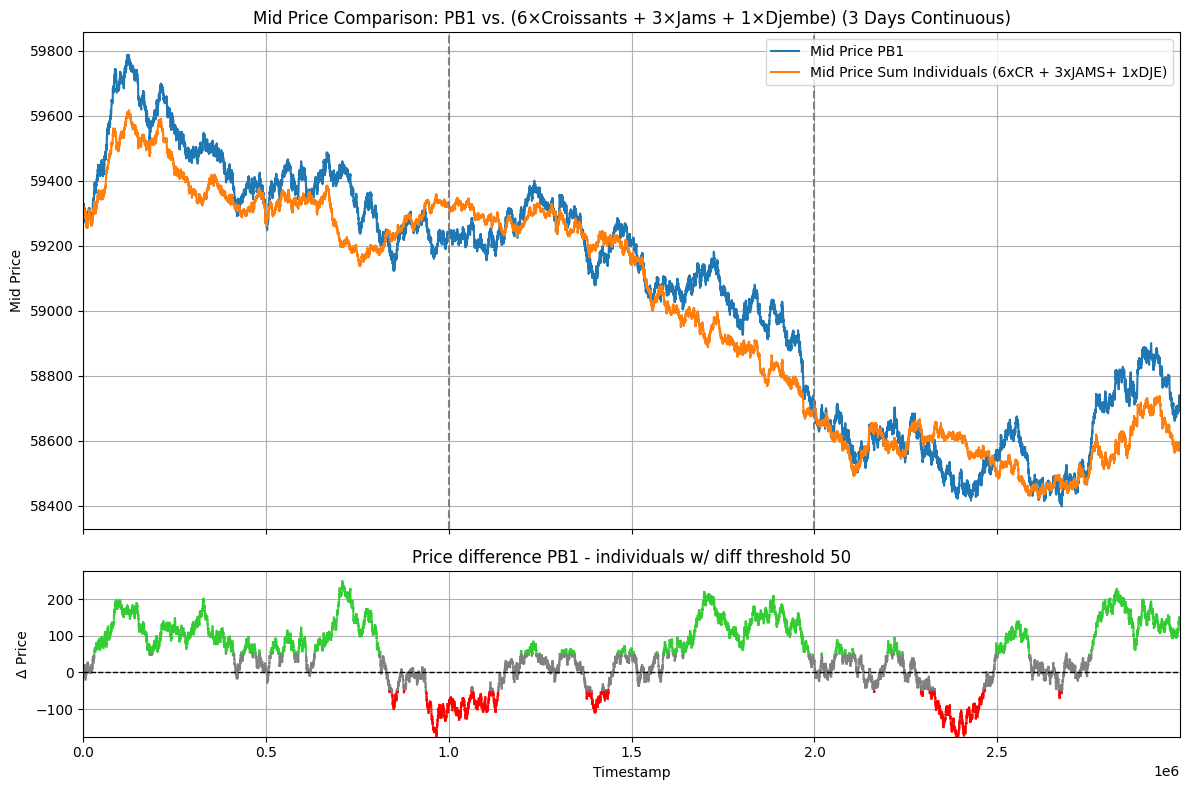

In [50]:
# Build segments for the line
points = np.array([timestamps, diff_pb1]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create color array: green if |diff| > 50, else gray
colors = np.full(len(segments), 'gray', dtype=object)  # default: gray
colors[diff_pb1[:-1] > 50] = 'limegreen'
colors[diff_pb1[:-1] < -50] = 'red'

lc = LineCollection(segments, colors=colors, linewidths=1.5, zorder=2)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Top plot: PB2 vs. Sum
ax1.plot(timestamps, mid_prices_pb1, label='Mid Price PB1')
ax1.plot(timestamps, mid_prices_pb1_indiv, label='Mid Price Sum Individuals (6xCR + 3xJAMS+ 1xDJE)')

ax1.set_ylabel('Mid Price')
ax1.set_title('Mid Price Comparison: PB1 vs. (6×Croissants + 3×Jams + 1×Djembe) (3 Days Continuous)')
ax1.legend()
ax1.grid(True)
ax1.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax1.axvline(x=offset_d0, color='gray', linestyle='--', label='Day 0 Start')
ax1.axvline(x=offset_dplus1, color='gray', linestyle='--', label='Day 1 Start')

# Bottom plot: Difference
ax2.set_title('Price difference PB1 - individuals w/ diff threshold 50')
ax2.add_collection(lc)
ax2.set_ylim(0.9*diff_pb1.min(), 1.1*diff_pb1.max())
ax2.axhline(0, color='black', linestyle='--', linewidth=1)
ax2.set_xlim(timestamps.min(), timestamps.max())
ax2.set_xlabel('Timestamp')
ax2.set_ylabel('Δ Price')
ax2.grid(True)
ax2.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

plt.tight_layout()
plt.show()

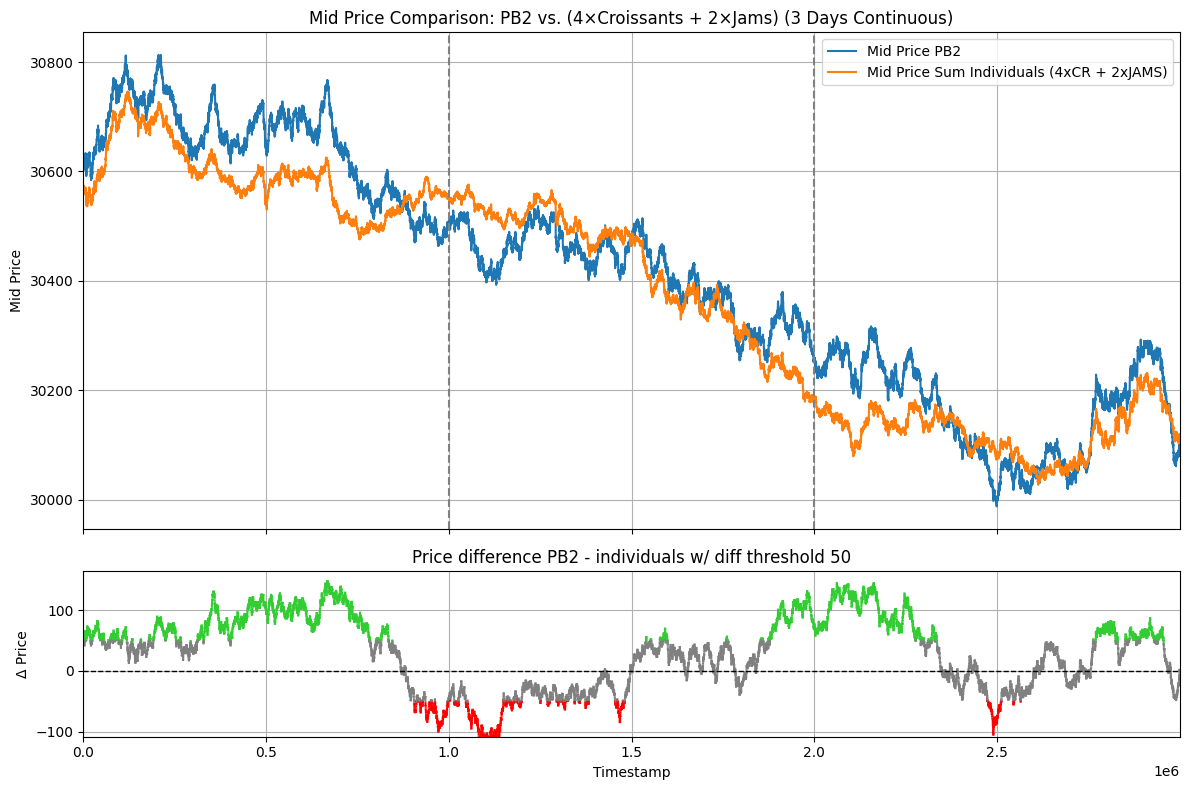

In [51]:
# Build segments for the line
points = np.array([timestamps, diff_pb2]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create color array: green if |diff| > 50, else gray
colors = np.full(len(segments), 'gray', dtype=object)  # default: gray
colors[diff_pb2[:-1] > 50] = 'limegreen'
colors[diff_pb2[:-1] < -50] = 'red'

lc = LineCollection(segments, colors=colors, linewidths=1.5, zorder=2)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Top plot: PB2 vs. Sum
ax1.plot(timestamps, mid_prices_pb2, label='Mid Price PB2')
ax1.plot(timestamps, mid_prices_pb2_indiv, label='Mid Price Sum Individuals (4xCR + 2xJAMS)')

ax1.set_ylabel('Mid Price')
ax1.set_title('Mid Price Comparison: PB2 vs. (4×Croissants + 2×Jams) (3 Days Continuous)')
ax1.legend()
ax1.grid(True)
ax1.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax1.axvline(x=offset_d0, color='gray', linestyle='--', label='Day 0 Start')
ax1.axvline(x=offset_dplus1, color='gray', linestyle='--', label='Day 1 Start')

# Bottom plot: Difference
ax2.set_title('Price difference PB2 - individuals w/ diff threshold 50')
ax2.add_collection(lc)
ax2.set_ylim(0.9*diff_pb2.min(), 1.1*diff_pb2.max())
ax2.axhline(0, color='black', linestyle='--', linewidth=1)
ax2.set_xlim(timestamps.min(), timestamps.max())
ax2.set_xlabel('Timestamp')
ax2.set_ylabel('Δ Price')
ax2.grid(True)
ax2.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

plt.tight_layout()
plt.show()

In [86]:
[mid_prices_pb1[0]]

[np.float64(59289.0)]

In [83]:
def calc_ema(combo):

    alpha = 0.05
    lookback_N = 20
    alpha_N = 2 / (lookback_N + 1)

    if combo == 'PB1':
        ema = [mid_prices_pb1[0]]
        for k in range(1, len(timestamps)):
            if mid_prices_pb1[k] is None:
                continue
            ema.append(alpha_N * mid_prices_pb1[k] + (1-alpha_N * ema[k-1]))
        return ema

    elif combo == 'PB2':
        ema = [mid_prices_pb2[0]]
        for k in range(1, len(timestamps)):
            ema.append(alpha*mid_prices_pb2[k] + (1-alpha)*ema[-1])
        return ema

    elif combo == 'PB1_indiv':
        ema = [mid_prices_pb1_indiv[0]]
        for k in range(1, len(timestamps)):
            ema.append(alpha*mid_prices_pb1_indiv[k] + (1-alpha)*ema[-1])
        return ema

    elif combo == 'PB2_indiv':
        ema = [mid_prices_pb2_indiv[0]]
        for k in range(1, len(timestamps)):
            ema.append(alpha*mid_prices_pb2_indiv[k] + (1-alpha)*ema[-1])
        return ema

In [84]:
ema_pb1 = calc_ema('PB1')
ema_pb2 = calc_ema('PB2')
ema_pb1_indiv = calc_ema('PB1_indiv')
ema_pb2_indiv = calc_ema('PB2_indiv')

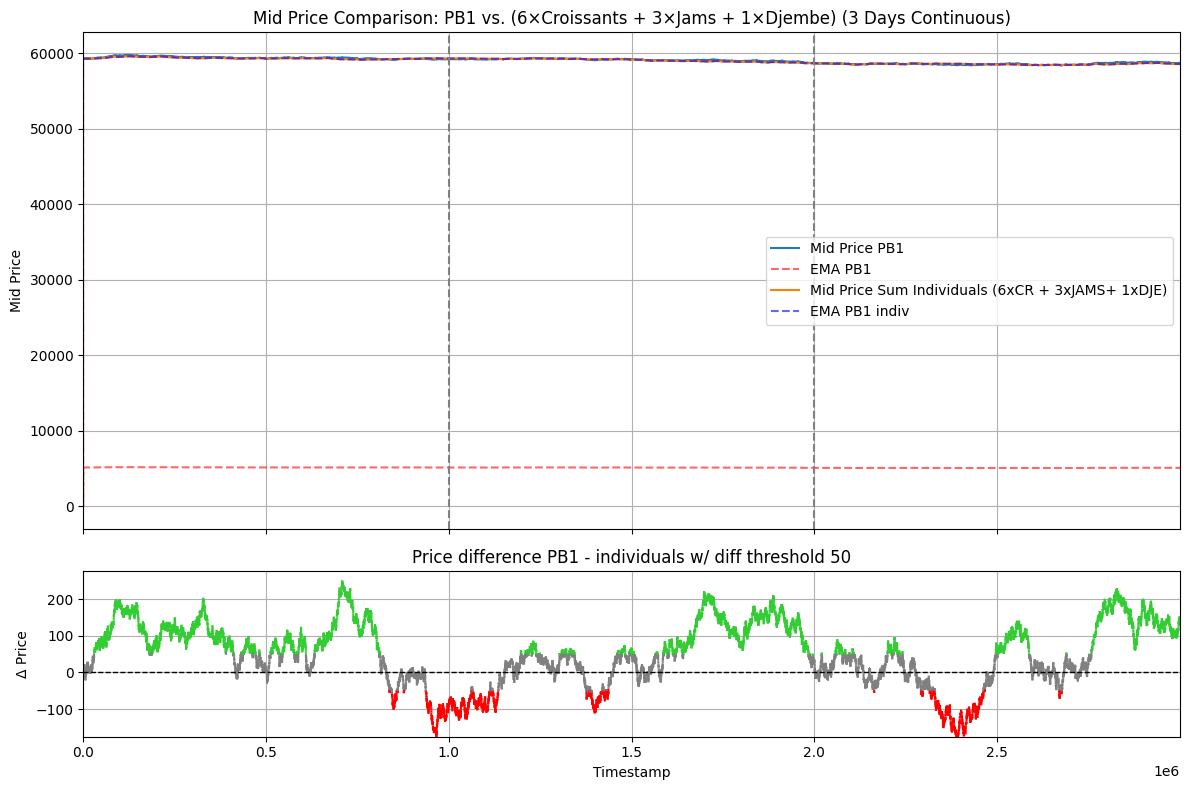

In [85]:
# Build segments for the line
points = np.array([timestamps, diff_pb1]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create color array: green if |diff| > 50, else gray
colors = np.full(len(segments), 'gray', dtype=object)  # default: gray
colors[diff_pb1[:-1] > 50] = 'limegreen'
colors[diff_pb1[:-1] < -50] = 'red'

lc = LineCollection(segments, colors=colors, linewidths=1.5, zorder=2)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Top plot: PB2 vs. Sum
ax1.plot(timestamps, mid_prices_pb1, label='Mid Price PB1')
ax1.plot(timestamps, ema_pb1, ls='--', alpha=0.6, c='r', label='EMA PB1')
ax1.plot(timestamps, mid_prices_pb1_indiv, label='Mid Price Sum Individuals (6xCR + 3xJAMS+ 1xDJE)')
ax1.plot(timestamps, ema_pb1_indiv, ls='--', alpha=0.6, c='b', label='EMA PB1 indiv')

ax1.set_ylabel('Mid Price')
ax1.set_title('Mid Price Comparison: PB1 vs. (6×Croissants + 3×Jams + 1×Djembe) (3 Days Continuous)')
ax1.legend()
ax1.grid(True)
ax1.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax1.axvline(x=offset_d0, color='gray', linestyle='--', label='Day 0 Start')
ax1.axvline(x=offset_dplus1, color='gray', linestyle='--', label='Day 1 Start')

# Bottom plot: Difference
ax2.set_title('Price difference PB1 - individuals w/ diff threshold 50')
ax2.add_collection(lc)
ax2.set_ylim(0.9*diff_pb1.min(), 1.1*diff_pb1.max())
ax2.axhline(0, color='black', linestyle='--', linewidth=1)
ax2.set_xlim(timestamps.min(), timestamps.max())
ax2.set_xlabel('Timestamp')
ax2.set_ylabel('Δ Price')
ax2.grid(True)
ax2.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

plt.tight_layout()
plt.show()